# Generation of new datasets by using different missing value imputation techniques:
We have generated four datasets for ML model generation by using missing value imputation strategies and deletion of all impossible zeros in the dataset. 
The four datasets generated are:
- Dataset generated after deleting of all impossible zeros from the dataset

- Dataset generated after KNN imputation

- Dataset generated after Simple Imputation (median) approach
- Dataset generated after MICE imputation

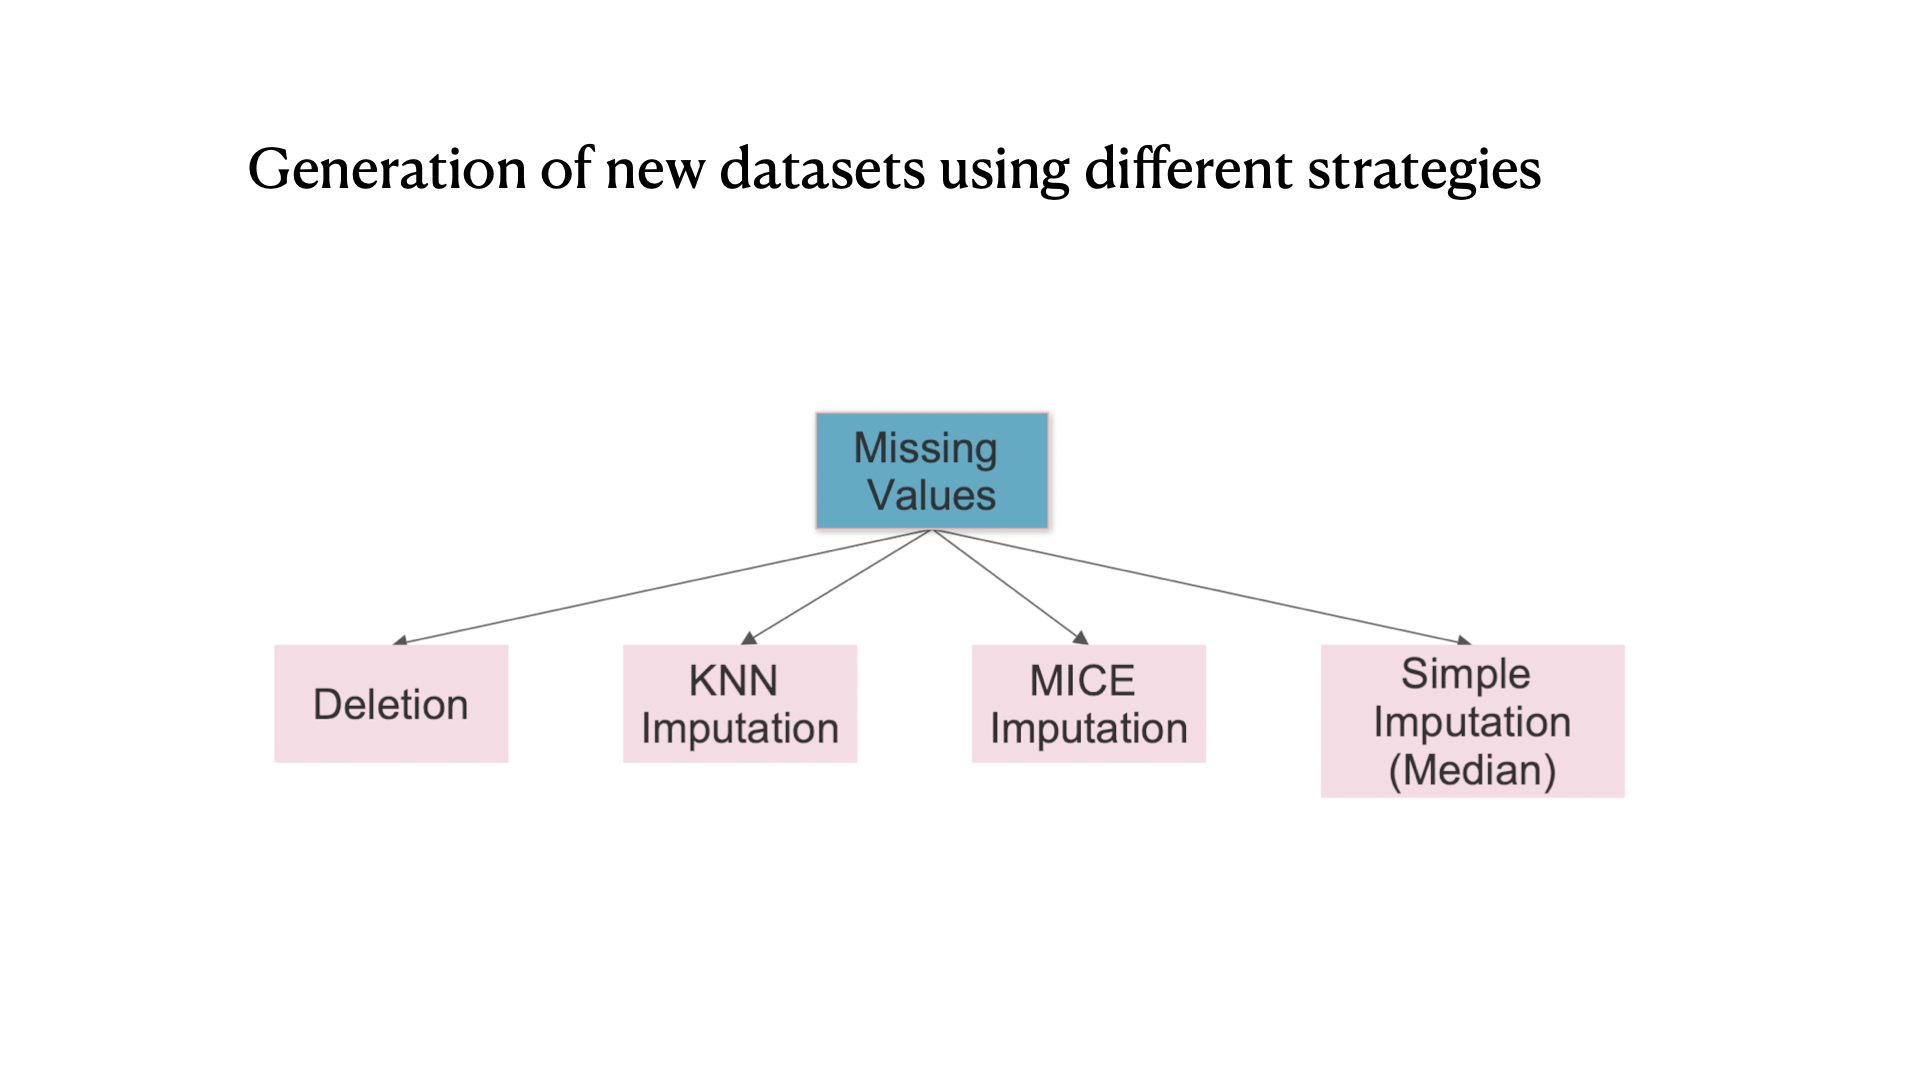

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
!pip install plotly
import plotly.offline as py
import plotly.graph_objs as go
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer


As we found out that there are around 50% & 30% missing values in Insulin & SkinThickness, respectively and few missing values in Glucose, BloodPressure & BMI, we will use mainly four strategies (BingYune Chen, 2020) for dealing with the missing values in the current dataset:

# 1). Delete missing values: 

this is simplest strategy for handling missing values. We will remove all missing values from the data as this is unbiased & basic strategy for dealing with missing values.


In [8]:
#Loading the modified dataset (dataset that we generated in Exploratory Data Analysis notebook after replacing impossible null values with nan) dataset
diabetes_df = pd.read_csv("diabetes_df.csv")

In [9]:
#Method 1 for dealing with missing values
#print('----- all  impossible zeros deletion -----\n')

# Apply deletion of all impossible zeros from the dataset
diabetes_df_copy = diabetes_df.copy(deep=True)
print("Original Data {}".format(diabetes_df_copy.shape))
diabetes_df_copy.dropna(inplace=True)

print("After Deletion {}".format(diabetes_df_copy.shape))

# Deleted 48% of the dataset (red flag)

print('\n----- missing value Deletion -----\n')
diabetes_df_copy.shape
diabetes_df_copy.head(5)

Original Data (768, 9)
After Deletion (392, 9)

----- missing value Deletion -----



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1


In [15]:
#saving the diabetes_df_copy into csv format for further processing in separate notebooks
diabetes_df_copy.to_csv('diabetes_df_copy.csv', index = False)

In [16]:
diabetes_df_copy.shape

(392, 9)

# 2). KNN imputation:
The KNNImputer class from scikit-learn provides imputation for filling in missing values using the k-Nearest Neighbors approach. Using the values from n-neighbors (nearest neighbors, which are two in present case) that have a value for the feature, the algorithm assigns a value to each missing value. The feature of the neighbors are averaged uniformly or weighted by distance to each neighbor.

In [26]:
#method 2 for dealing with missing values
feature_names=diabetes_df.columns[:-1]
# Define X and y
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

X_knn = diabetes_df[feature_names]
y_knn = diabetes_df[["Outcome"]]


# Print data details before imputation
print('----- See Original Count, Mean, and STD -----\n')
print(X_knn.describe())

knn_imputer = KNNImputer(n_neighbors=2, weights='uniform')
Xtrans_knn = knn_imputer.fit_transform(X_knn)

# Print data details after imputation
print('\n----- See Changes in Count, Mean, and STD -----\n')
print(pd.DataFrame(Xtrans_knn, columns=X_knn.columns).describe())

df_Xtrans_knn = pd.DataFrame(Xtrans_knn, columns=X_knn.columns)
diabetes_df_knn = pd.concat([df_Xtrans_knn, y_knn], axis=1)

#By KNN imputation method,there was very small change in value of all variables and even without changing the count of rows
#diabetes new data after knn imputation that will be used for classification algorithm

----- See Original Count, Mean, and STD -----

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  763.000000     733.000000     541.000000  394.000000   
mean      3.845052  121.686763      72.405184      29.153420  155.548223   
std       3.369578   30.535641      12.382158      10.476982  118.775855   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.000000      64.000000      22.000000   76.250000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  141.000000      80.000000      36.000000  190.000000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  757.000000                768.000000  768.000000  
mean    32.457464                  0.471876   33.240885  
std      6.924988                  0.331329   11.760232  
min     18.200000                  0

In [27]:
diabetes_df_knn.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,113.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,88.5,26.6,0.351,31.0,0
2,8.0,183.0,64.0,24.0,227.5,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1


In [28]:
#saving the diabetes_df_knn into csv format for further processing in separate notebooks
diabetes_df_knn.to_csv('diabetes_df_knn.csv', index = False)

# 3). MICE imputation

The Multivariate Imputation by Chained Equations (MICE) imputation: It uses the IterativeImputer class from scikit-learn to support iterative imputation. The strategy models each feature with missing values as a function of other features in a round-robin fashion. The algorithm performs multiple regressions over random samples of the data, then takes the average of the multiple regression values and uses that value to impute the missing value.

In [30]:
#method 3 for dealing with missing values
#The Multivariate Imputation by Chained Equations (MICE) uses the IterativeImputer class from scikit-learn 
#to support iterative imputation. The strategy models each feature with missing values as a function of other features in a round-robin fashion. 
#The algorithm performs multiple regressions over random samples of the data, then takes the average of the multiple regression values and uses that value to impute the missing value.

# Define X and y
X_mice = diabetes_df[diabetes_df.columns[:-1]]
y_mice = diabetes_df[["Outcome"]]


# Print total missing before imputation
print('----- See Original Count, Mean, and STD -----\n')
print(X_mice.describe())

mice_imputer = IterativeImputer() # default max_iter=10 for rounds of imputation
Xtrans_mice = mice_imputer.fit_transform(X_mice)

# Print total missing after imputation
print('\n----- See Changes in Count, Mean, and STD -----\n')
print(pd.DataFrame(Xtrans_mice, columns=X_mice.columns).describe())

df_Xtrans_mice = pd.DataFrame(Xtrans_mice, columns=X_mice.columns)
diabetes_df_mice = pd.concat([df_Xtrans_mice, y_mice], axis=1)


----- See Original Count, Mean, and STD -----

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  763.000000     733.000000     541.000000  394.000000   
mean      3.845052  121.686763      72.405184      29.153420  155.548223   
std       3.369578   30.535641      12.382158      10.476982  118.775855   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.000000      64.000000      22.000000   76.250000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  141.000000      80.000000      36.000000  190.000000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  757.000000                768.000000  768.000000  
mean    32.457464                  0.471876   33.240885  
std      6.924988                  0.331329   11.760232  
min     18.200000                  0

In [31]:
#saving the diabetes_df_mice into csv format for further processing in separate notebooks
diabetes_df_mice.to_csv('diabetes_df_mice.csv', index = False)

# 4). Simple Imputation using median

In [32]:
#method 4 for dealing with missing values
#example of imputing missing values using scikit-learn
# Define X and y
X_simple_imput = diabetes_df[diabetes_df.columns[:-1]]
y_median = diabetes_df[["Outcome"]]

# define the imputer
imputer = SimpleImputer(strategy='median')
# Fit on the dataset
imputer.fit(X_simple_imput)

# Transform the dataset
Xtrans_median = imputer.transform(X_simple_imput)

# Print total missing before imputation
print('----- See Original Count, Mean, and STD -----\n')
print(X_simple_imput.describe())


# Print total missing after imputation
print('\n----- See Changes in Count, Mean, and STD -----\n')
print(pd.DataFrame(Xtrans_median, columns=X_simple_imput.columns).describe())

df_Xtrans_median = pd.DataFrame(Xtrans_median, columns=X_simple_imput.columns)
diabetes_df_median = pd.concat([df_Xtrans_median, y_median], axis=1)


----- See Original Count, Mean, and STD -----

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  763.000000     733.000000     541.000000  394.000000   
mean      3.845052  121.686763      72.405184      29.153420  155.548223   
std       3.369578   30.535641      12.382158      10.476982  118.775855   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.000000      64.000000      22.000000   76.250000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  141.000000      80.000000      36.000000  190.000000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  757.000000                768.000000  768.000000  
mean    32.457464                  0.471876   33.240885  
std      6.924988                  0.331329   11.760232  
min     18.200000                  0

In [33]:
#saving the diabetes_df_median into csv format for further processing in separate notebooks
diabetes_df_median.to_csv('diabetes_df_median.csv', index = False)